In [1]:
import numpy as np
import cptac
import cnvutils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CHROMOSOME = '8'
ARM = 'q'
TRANS_OR_CIS = 'cis'

In [3]:
ttest_results_file = f"{CHROMOSOME}{ARM}_{TRANS_OR_CIS}effects_ttest.tsv"

ttest_results = pd.\
read_csv(ttest_results_file, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")
id_cols = [col for col in ttest_results.columns if not 'Database_ID' in col]
ttest_results = ttest_results[id_cols]
pvalue_cols = [col for col in ttest_results.columns if 'pvalue' in col]
ttest_results = ttest_results[pvalue_cols]

In [4]:
def get_cancer(val):
    val_list = val.split('_')
    return val_list[0].upper()

In [5]:
ttest_results_long = ttest_results.reset_index().melt(id_vars='protein', var_name='cancer').sort_values('protein')
ttest_results_long['cancer'] = ttest_results_long.cancer.apply(get_cancer)
ttest_results_long

,protein,cancer,value
0,ANKRD46,BRCA,8.642930e-02
524,ANKRD46,LUAD,2.920110e-01
393,ANKRD46,LSCC,2.679197e-01
655,ANKRD46,OVARIAN,1.452483e-01
262,ANKRD46,HNSCC,5.500426e-01
131,ANKRD46,COLON,NaN
1,ASAP1,BRCA,8.228966e-02
525,ASAP1,LUAD,6.958844e-01
394,ASAP1,LSCC,9.183494e-01
263,ASAP1,HNSCC,8.246653e-01


In [6]:
ttest_results_long[ttest_results_long["protein"] == "MYC"]

,protein,cancer,value


In [7]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [8]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

In [9]:
results = results.sort_values(['start_bp', 'cancer'])

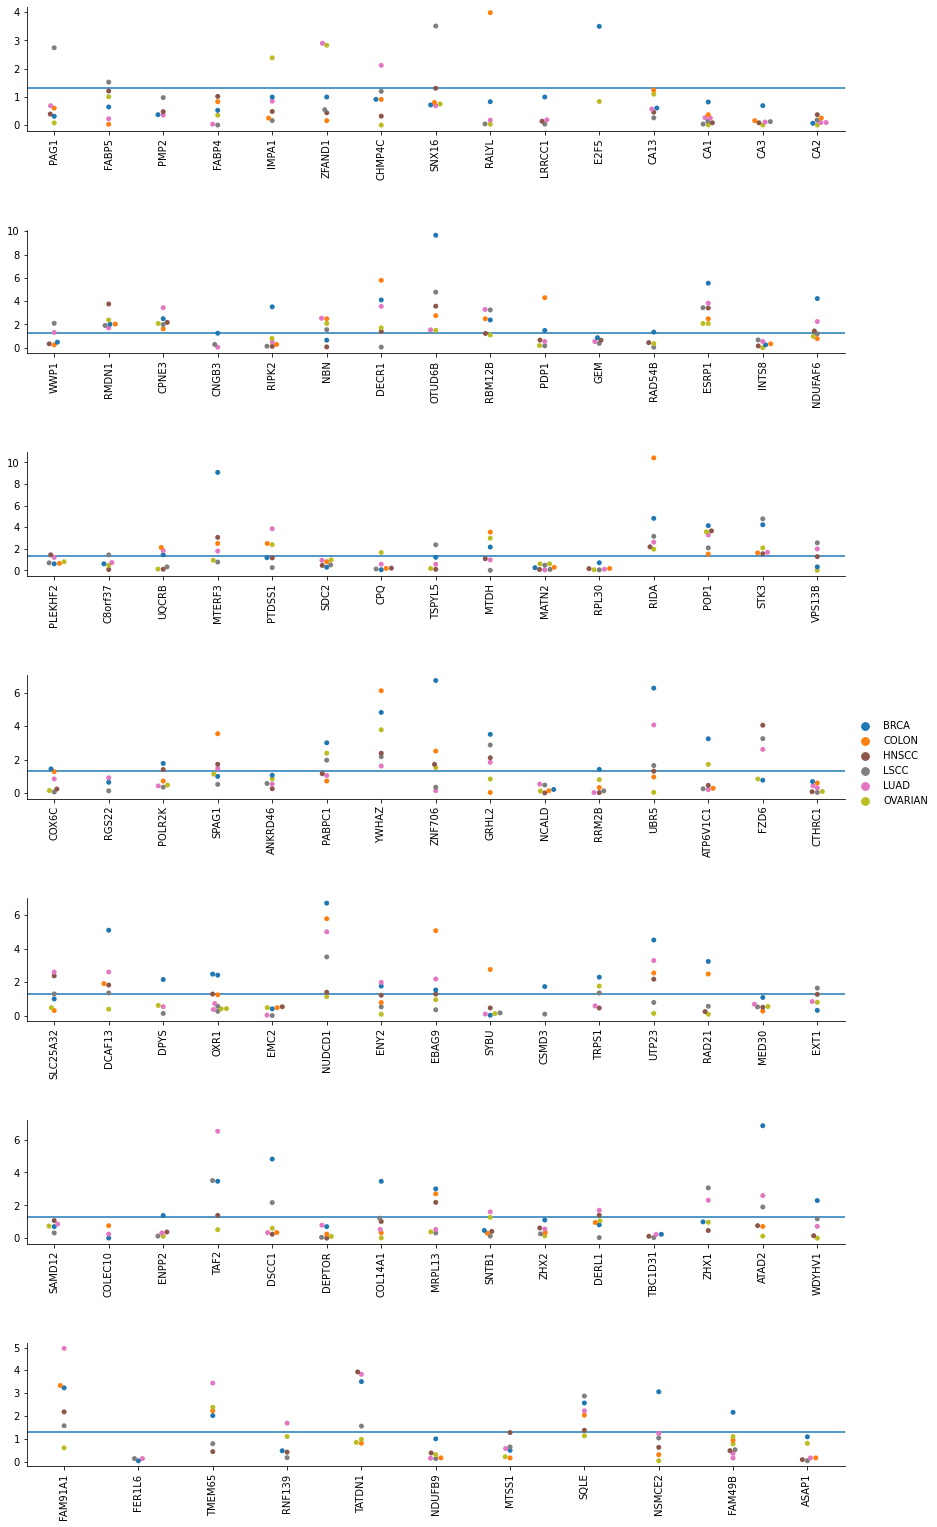

In [10]:
cnvutils.make_pvalue_plot(
    results,
    label_column='index', 
    value_column='value', 
    group_column='cancer', 
    labels_per_plot=15)
# plt.legend()

In [11]:
pd.options.display.max_rows = 900
locs = cnvutils.get_gene_locations()

chr8q = locs[(locs["chromosome"] == "8") & (locs["arm"] == "q")].\
sort_values(by=["arm", "start_bp"]).\
reset_index()

chr8q = chr8q[~chr8q["Name"].str.contains("\.", regex=True)].\
drop(columns="Database_ID").\
drop_duplicates(keep="first")

chr8q

,Name,chromosome,start_bp,end_bp,arm
0,HSPA8P13,8,46549089.0,46550802.0,q
1,ASNSP1,8,46579213.0,46638886.0,q
3,ASNSP4,8,46697630.0,46698688.0,q
5,TRIM60P15,8,46792065.0,46793064.0,q
8,LINC00293,8,46822174.0,46907309.0,q
10,MTND2P38,8,46827228.0,46827894.0,q
11,MTND1P7,8,46828117.0,46828413.0,q
12,RNU6-656P,8,46831050.0,46831156.0,q
13,MTCYBP20,8,46837578.0,46838706.0,q
14,MTND6P20,8,46838788.0,46839205.0,q
